
Descriptive statistics of shifted monthly sales:
count        13.000000
mean     171353.307692
std       15768.294990
min      150620.000000
25%      155278.000000
50%      174406.000000
75%      181792.000000
max      200418.000000
Name: sales, dtype: float64


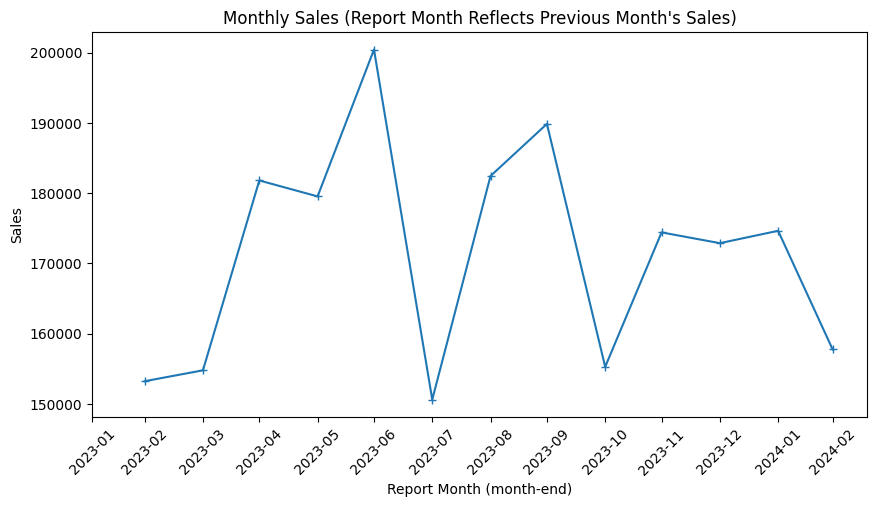

In [9]:
from getpass import getuser
import pandas as pd
import matplotlib.pyplot as plt

# user = getuser()
# csv_location = f'/home/{user}/dan/private/exrc_04/data/{user}_prob3_sales.csv'
csv_location = "ah4323_prob3_sales.csv"
# csv_location =  "FILE_NAME" ### GIVE FILE_NAME TO RUN THE CODE LOCALLY

# Load input CSV data which contains some (fake) daily sales data
df = pd.read_csv(csv_location)

# # Lets describe and check the data and properties of dataframe
# print(df.info())  # prints concise summary about DataFrame's structure
# print(df.columns) # prints information about columns
# print(df.head())  # prints first five rows - default

# Extract ´sales´ and ´date´ columns only which are needed
df = df[["date", "sales"]]

# # Check the columns again)
# print(df.columns)

# Convert data type of date column currently its object
df['date'] = pd.to_datetime(df['date'])

# print(df.info()) # check the data types for columns again

# index the dataframe by the´date' column
df = df.set_index('date')
# print(df.head())

# using **resample** and **sum**, downsample the data from daily to a monthly frequency
df_monthly_sales = df.resample('ME').sum() # Aggregates the sales upto end of each month
# print(df_monthly_sales.head())

# Shift the resampled data by one month to reflect the previous month's sales usig ´shift()´ method
df_monthly_sales_shifted = df_monthly_sales.shift(1)
# print(df_monthly_sales_shifted.head())
# print(df_monthly_sales_shifted.to_string()) # to print the whole dataframe

# Descriptive statistics on the shifted monthly sales column
stats = df_monthly_sales_shifted['sales'].describe()
print("\nDescriptive statistics of shifted monthly sales:")
print(stats)

# Plot a sales curve (shifted monthly totals) using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(df_monthly_sales_shifted.index, df_monthly_sales_shifted['sales'], marker='+',)
plt.title("Monthly Sales (Report Month Reflects Previous Month's Sales)")
plt.xlabel("Report Month (month-end)")
plt.ylabel("Sales")

# Force month labels for every tick / marker
plt.xticks(df_monthly_sales_shifted.index, df_monthly_sales_shifted.index.strftime('%Y-%m'), rotation=45)

plt.show()